In [1]:
# set up
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# value_counts does what I need but just in case
from collections import Counter

In [3]:
# load the cleaned data set
live = pd.read_csv('data/post_clean.csv', index_col='date_installed', parse_dates=True);

##### CLEANING: drop date_installed

In [4]:
# have a look; date_installed.1 is a dup
live.head()

,state,date_installed.1,size_kw,zipcode,install_type,installer,cost_per_watt,cost,city,county,new_constr,tracking,3rdparty
date_installed,,,,,,,,,,,,,
2001-01-04,CA,2001-01-04,2.226,92111.0,residential,NaN,7.880,17541.33,NaN,San Diego,NaN,NaN,NaN
2001-01-04,CA,2001-01-04,2.671,90638.0,residential,NaN,5.750,15356.88,NaN,Los Angeles,NaN,NaN,NaN
2001-01-09,OR,2001-01-09,0.750,97734.0,residential,Self,12.164,9123.00,Culver,Jefferson,NaN,NaN,NaN
2001-01-18,CA,2001-01-18,0.997,92126.0,residential,NaN,5.370,5352.30,NaN,San Diego,NaN,NaN,NaN
2001-01-18,CA,2001-01-18,1.496,91342.0,residential,NaN,7.100,10623.00,NaN,Los Angeles,NaN,NaN,NaN


In [5]:
# some stats
live.describe()

,size_kw,zipcode,cost_per_watt,cost,new_constr,tracking,3rdparty
count,673029.000000,673029.000000,673029.000000,6.729340e+05,21000.0,1270.0,234925.0
mean,6.128302,71117.734763,5.798609,3.376678e+04,1.0,1.0,1.0
std,7.040995,35870.841194,1.988170,3.155320e+04,0.0,0.0,0.0
min,0.050000,0.000000,0.000000,0.000000e+00,1.0,1.0,1.0
25%,3.748800,77301.000000,4.536806,2.068000e+04,1.0,1.0,1.0
50%,5.400000,91606.000000,5.408511,2.937968e+04,1.0,1.0,1.0
75%,7.595000,93436.000000,6.950000,4.110000e+04,1.0,1.0,1.0
max,1989.520000,99737.000000,29.825243,3.940000e+06,1.0,1.0,1.0


In [6]:
live.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 673029 entries, 2001-01-04 to 2016-12-30
Data columns (total 13 columns):
state               673029 non-null object
date_installed.1    673029 non-null object
size_kw             673029 non-null float64
zipcode             673029 non-null float64
install_type        673029 non-null object
installer           439589 non-null object
cost_per_watt       673029 non-null float64
cost                672934 non-null float64
city                503629 non-null object
county              668724 non-null object
new_constr          21000 non-null float64
tracking            1270 non-null float64
3rdparty            234925 non-null float64
dtypes: float64(7), object(6)
memory usage: 71.9+ MB


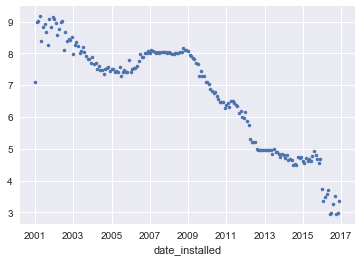

In [7]:
### discontinuity at the end of 2015 is result of policy change.  Federal tax credit was extended
### to 2021.
live.cost_per_watt.resample('M').median().plot(marker='.', linestyle='none'); plt.show()

##### CLEANING: change 3rdparty to thirdparty for convenience; consider .as_type(np.bool)

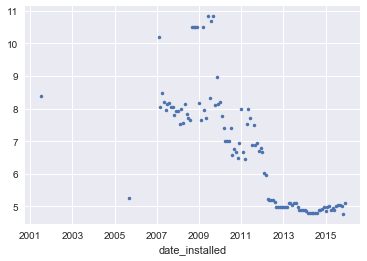

In [8]:
### 3rd parties pay higher install price; also we don't see the data for 2016.

live[(live['3rdparty'] == 1)].cost_per_watt.resample('M').median().plot(marker='.', linestyle='none'); plt.show()

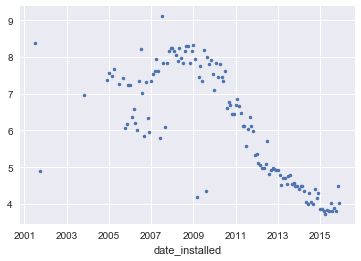

In [9]:
### new construction isn't generally less expensive
live[(live.new_constr == 1)].cost_per_watt.resample('M').median().plot(marker='.', linestyle='none'); plt.show()

In [10]:
# how many installs for each state
by_state=live.groupby('state')

In [11]:
state_counts = by_state.install_type.count()

In [12]:
state_counts.sort_values(inplace=True)

In [13]:
state_counts_percent = state_counts/state_counts.sum()

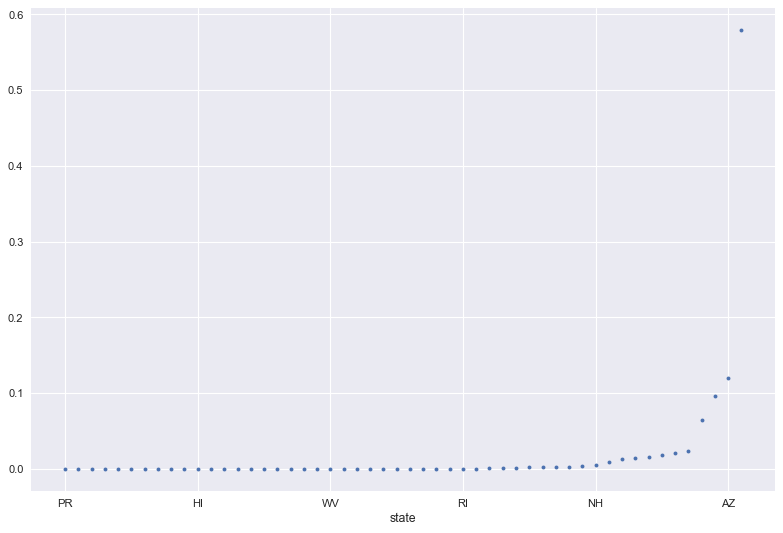

In [16]:
fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
state_counts_percent.plot(marker='.', linestyle='none')
plt.show()

In [15]:
state_counts[-15:]

state
OR      1970
FL      2022
DE      2939
NH      3101
NM      6006
NJ      8556
PA      9653
MD     10525
TX     12324
NV     14339
CT     15411
NY     43454
MA     64524
AZ     80586
CA    390264
Name: install_type, dtype: int64

In [26]:
live.index.year[:10]

Int64Index([2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001], dtype='int64', name='date_installed')

In [33]:
live.groupby(live.index.year).size()

date_installed
2001      1449
2002      2783
2003      3491
2004      5496
2005      5676
2006      8985
2007     19355
2008     25139
2009     44010
2010     64580
2011     69442
2012     97254
2013     72601
2014     68887
2015    183652
2016       229
dtype: int64